<a href="https://colab.research.google.com/github/amejiyo/WebSum/blob/main/mT5thai/mt5_thai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**💡 More Ideas**

> [Hugging face Inference API](https://huggingface.co/inference-api) Free Plug & Play Machine Learning API
Easily integrate NLP, audio and computer vision models deployed for inference via simple API calls. Harness the power of machine learning while staying out of MLOps! [Read the docs](https://huggingface.co/docs/api-inference/index) 




In [1]:
!pip install --no-cache-dir transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 183.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 171.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.0 MB/s eta 0:00:00


# Method 1: **mT5** on *hugging face*

#### Disclaimer : 
This notebook contains the finetuned mT5-base model for Thai sentence summarization. The architecture of the model is based on mT5 model and fine-tuned on text-summarization pairs in Thai. 

From [`huggingface/thanathorn/mt5-cpe-kmutt-thai-sentence-sum`](https://huggingface.co/thanathorn/mt5-cpe-kmutt-thai-sentence-sum)

In [2]:
from transformers import pipeline
from tqdm.auto import tqdm

In [ ]:
# Using Pipeline

# summarizer = pipeline("summarization", model="google/mt5-small")
# summarizer = pipeline("summarization", model="thanathorn/mt5-cpe-kmutt-thai-sentence-sum")

summarizer = pipeline(
    "summarization", 
    model="thanathorn/mt5-cpe-kmutt-thai-sentence-sum",

    # Parameters that define the output variables of `generate`
    output_attentions=True,
    output_scores=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
sentense = '''แนวโน้มของการใช้หุ่นยนต์ทางด้านการผลิตและงานบริการมีจำนวนสูงขึ้นมากกว่า 30% ทุกปี แต่ประเทศไทยยังขาดบุคลากรด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติในทุกระดับ 
โดยเฉพาะอาชีพวิศวกร อาจารย์และนักวิจัย ฟีโบ้จึงได้รับการก่อตั้งขึ้น ในปี 2538 โดย รศ. ดร.ชิต เหล่าวัฒนา และฟีโบ้มีคติพจน์ว่า “A Cradle of Future Leaders in Robotics” 
ที่มุ่งสร้างผู้นำด้านวิทยาการหุ่นยนต์ของไทย

ฟีโบ้เป็นสถาบันระดับคณะแห่งแรกและแห่งเดียวในไทยที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี ปริญญาโท และปริญญาเอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ ทุกหลักสูตรเน้นหลัก 
Outcome-based Education ที่บัณฑิตสามารถใช้สมรรถนะที่เรียนในการพัฒนาเทคโนโลยีหุ่นยนต์ขึ้นได้ ทำให้บัณฑิตฟีโบ้เป็นที่ต้องการของภาคเอกชนและภาครัฐอย่างมาก

นอกจากนี้ฟีโบ้มีผลงานวิจัย/พัฒนาและให้บริการวิชาการด้านหุ่นยนต์เพื่อการผลิตและเพื่อพัฒนาคุณภาพชีวิตมากกว่า 300 ระบบ โดยมีความร่วมมือที่แข็งแกร่งกับภาครัฐและภาคธุรกิจอุตสาหกรรมชั้นนำ 
ทั้งกลุ่มปิโตรเลียม อาหาร ฮาร์ดดิสก์ การผลิตไฟฟ้า การขนส่ง ธุรกิจบริการ การศึกษา การแพทย์และการฟื้นฟูสมรรถภาพ

ปัจจุบัน ฟีโบ้ โดยการนำของ รศ. ดร.สยาม เจริญเสียง ผู้อำนวยการสถาบันฯ มุ่งมั่นเพื่อยกระดับฟีโบ้เข้าสู่สถาบันชั้นนำระดับอาเซียนทางด้านวิทยาการหุ่นยนต์ 
รวมทั้งสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์ ครูและนักเรียนของโรงเรียนทั่วประเทศมากกว่า 100 โรงเรียน'''

outputs = summarizer( sentense, min_length=50, max_length=100, do_sample=False)

In [ ]:
outputs # [0]['summary_text']

[{'summary_text': 'ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติ'}]

In [ ]:
sentense = '''แนวโน้มของการใช้หุ่นยนต์ทางด้านการผลิตและงานบริการมีจำนวนสูงขึ้นมากกว่า 30% ทุกปี แต่ประเทศไทยยังขาดบุคลากรด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติในทุกระดับ 
โดยเฉพาะอาชีพวิศวกร อาจารย์และนักวิจัย ฟีโบ้จึงได้รับการก่อตั้งขึ้น ในปี 2538 โดย รศ. ดร.ชิต เหล่าวัฒนา และฟีโบ้มีคติพจน์ว่า “A Cradle of Future Leaders in Robotics” 
ที่มุ่งสร้างผู้นำด้านวิทยาการหุ่นยนต์ของไทย

ฟีโบ้เป็นสถาบันระดับคณะแห่งแรกและแห่งเดียวในไทยที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี ปริญญาโท และปริญญาเอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ ทุกหลักสูตรเน้นหลัก 
Outcome-based Education ที่บัณฑิตสามารถใช้สมรรถนะที่เรียนในการพัฒนาเทคโนโลยีหุ่นยนต์ขึ้นได้ ทำให้บัณฑิตฟีโบ้เป็นที่ต้องการของภาคเอกชนและภาครัฐอย่างมาก

นอกจากนี้ฟีโบ้มีผลงานวิจัย/พัฒนาและให้บริการวิชาการด้านหุ่นยนต์เพื่อการผลิตและเพื่อพัฒนาคุณภาพชีวิตมากกว่า 300 ระบบ โดยมีความร่วมมือที่แข็งแกร่งกับภาครัฐและภาคธุรกิจอุตสาหกรรมชั้นนำ 
ทั้งกลุ่มปิโตรเลียม อาหาร ฮาร์ดดิสก์ การผลิตไฟฟ้า การขนส่ง ธุรกิจบริการ การศึกษา การแพทย์และการฟื้นฟูสมรรถภาพ

ปัจจุบัน ฟีโบ้ โดยการนำของ รศ. ดร.สยาม เจริญเสียง ผู้อำนวยการสถาบันฯ มุ่งมั่นเพื่อยกระดับฟีโบ้เข้าสู่สถาบันชั้นนำระดับอาเซียนทางด้านวิทยาการหุ่นยนต์ 
รวมทั้งสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์ ครูและนักเรียนของโรงเรียนทั่วประเทศมากกว่า 100 โรงเรียน'''

min_max_length  = ((10, 50), (50, 100), (150, 200))

# do_sample=False and num_beams=1, then your generate method will use greedy decoding.
print('\n<do_sample=False> (greedy decoding)')
for min,max in min_max_length:
    print(':', summarizer( sentense, max_length=max, min_length=min, do_sample=False)[0]['summary_text'])

# do_sample: if set to True, this parameter enables decoding strategies such as multinomial sampling, beam-search multinomial sampling, 
# Top-K sampling and Top-p sampling. All these strategies select the next token from the probability distribution over the entire vocabulary 
# with various strategy-specific adjustments.
print('\n<do_sample=True>')
for min,max in min_max_length:
    print(':', summarizer( sentense, max_length=max, min_length=min, do_sample=True)[0]['summary_text'])

print('\n<do_sample=False, num_beams=1>')
for min,max in min_max_length:
    print(':', summarizer( sentense, max_length=max, min_length=min, do_sample=False, num_beams=1)[0]['summary_text'])

print('\n<do_sample=True, num_beams=1>')
for min,max in min_max_length:
    print(':', summarizer( sentense, max_length=max, min_length=min, do_sample=True, num_beams=1)[0]['summary_text'])

print('\n<do_sample=False, num_beams=2>')
for min,max in min_max_length:
    print(':', summarizer( sentense, max_length=max, min_length=min, do_sample=False, num_beams=2)[0]['summary_text'])

print('\n<do_sample=True, num_beams=2>')
for min,max in min_max_length:
    print(':', summarizer( sentense, max_length=max, min_length=min, do_sample=True, num_beams=2)[0]['summary_text'])

print('\n<do_sample=True, temperature=0.1>')
for min,max in min_max_length:
    print(':', summarizer( sentense, max_length=max, min_length=min, do_sample=True, temperature=0.1)[0]['summary_text'])

print('\n<do_sample=True, temperature=10.0>')
for min,max in min_max_length:
    print(':', summarizer( sentense, max_length=max, min_length=min, do_sample=True, temperature=10.0)[0]['summary_text'])

# output = summarizer( sentense, max_length=20, min_length=10, do_sample=False)[0]
# print(f"\n: {output['summary_text']}")
# output = summarizer( sentense, max_length=100, min_length=50, do_sample=False)[0]
# print(f"\n: {output['summary_text']}")
# output = summarizer( sentense, max_length=200, min_length=100, do_sample=False)[0]
# print(f"\n: {output['summary_text']}")


<do_sample=False> (greedy decoding)
: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ
: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติ
: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และเทคโนโลยีสารสนเทศ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และเทคโนโลยีสารสนเทศ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์

<do_sample=

**💡 More Hyperparameters to try!** from [customize text generation](https://huggingface.co/docs/transformers/generation_strategies#customize-text-generation)

Attribute | Description
--- | ---
**max_new_tokens** | the maximum number of tokens to generate. In other words, the size of the output sequence, not including the tokens in the prompt.
**num_beams** | by specifying a number of beams higher than 1, you are effectively switching from greedy search to beam search. This strategy evaluates several hypotheses at each time step and eventually chooses the hypothesis that has the overall highest probability for the entire sequence. This has the advantage of identifying high-probability sequences that start with a lower probability initial tokens and would’ve been ignored by the greedy search.
**do_sample** | if set to True, this parameter enables decoding strategies such as multinomial sampling, beam-search multinomial sampling, Top-K sampling and Top-p sampling. All these strategies select the next token from the probability distribution over the entire vocabulary with various strategy-specific adjustments.
**num_return_sequences** | the number of sequence candidates to return for each input. This options is only available for the decoding strategies that support multiple sequence candidates, e.g. variations of beam search and sampling. Decoding strategies like greedy search and contrastive search return a single output sequence.
**temperature** | (Default: 1.0). Float (0.0-100.0). The temperature of the sampling operation. 1 means regular sampling, 0 means always take the highest score, 100.0 is getting closer to uniform probability.
**top_k** | (Default: None). Integer to define the top tokens considered within the sample operation to create new text.
**top_p** | (Default: None). Float to define the tokens that are within the sample operation of text generation. Add tokens in the sample for more probable to least probable until the sum of the probabilities is greater than top_p.


##### More . . .

In [ ]:
output = summarizer( sentense, max_length=20, min_length=10, do_sample=False)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=100, min_length=50, do_sample=False)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=200, min_length=100, do_sample=False)[0]
print(f"\n: {output['summary_text']}")


: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี 

: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติ

: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์


In [ ]:
output = summarizer( sentense, max_length=20, min_length=10, do_sample=True)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=100, min_length=50, do_sample=True)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=200, min_length=100, do_sample=True)[0]
print(f"\n: {output['summary_text']}")

len 1238 => 69
: ฟีโบ้ ทําหน้าที่หลักการพัฒนาและถ่ายทอดศักยภาพให้กับนักศึกษาและบุคลากร
len 1238 => 179
: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและรับปริญญาครบทั้งระดับปริญญาตรี โท และเอก ในปี 2536 และได้ทําให้บุคลากรดีและศักยภาพสูงและเป็นที่ต้องการของภาคเอกชนและรัฐ กําลังพัฒนาด้านหุ่นยนต์
len 1238 => 369
: ฟีโบ้จัดทําขึ้นในปี 2536 โดยการนําของ รศ. ดร.สยาม เจริญเสียง มุ่งมั่นเพื่อยกระดับฟีโบ้เข้าสู่สถาบันชั้นนําระดับอาเซียนทางด้านวิทยาการหุ่นยนต์ และระบบอัตโนมัติในสาขาวิทยาการหุ่นยนต์ และหน่วยงานได้หลายระดับและมีแนวคิดที่เน้นเน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติทั้งระดับปริญญาตรี โท เอก ในวิทยาการหุ่นยนต์และระบบอัตโนมัติ


In [ ]:
output = summarizer( sentense, max_length=20, min_length=10, do_sample=True, num_beams=1)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=100, min_length=50, do_sample=True, num_beams=1)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=200, min_length=100, do_sample=True, num_beams=1)[0]
print(f"\n: {output['summary_text']}")


: ฟีโบ้ มีคติพจน์ว่า “ A Cradle of Future Leaders in

: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท โท เอกในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ ในสาขาของหุ่นยนต์และระบบอัตโนมัติ เน้นหลักการ Outcome–based Education

: ฟีโบ้ ยึดเป้นสถาบันหลักด้านวิทยาศาสตร์และระบบอัตโนมัติของไทยในมหาวิทยาลัยเอกชนและภาคธุรกิจอุตสาหกรรม. ผู้นําด้านหุ่นยนต์ ทางด้านการตลาด และ沮ณแพทย์และฟื้นฟูสมรรถภาพในประเทศไทยและเป็นศูนย์ที่ขับเคลื่อนไปทั่วโลกและมีการสนับสนุนทางด้านหุ่นยนต์ได้มากมาย ฟีโบ้มีการมุ่งมั่นกับการสร้างผู้นําด้านบริหารด้านหุ่นยนต์และระบบอัตโนมัติของไทยและคนไทยเป็นที่ต้องการของไทย ฟีโบ้มีการดําเนินการพัฒนาหลักสูตรด้านหุ่นยนต์และระบบอัตโนมัติในการแข่งขันและเพื่อพัฒนาคุณภาพชีวิต


In [ ]:
output = summarizer( sentense, max_length=20, min_length=10, do_sample=True, temperature=0.1)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=100, min_length=50, do_sample=True, temperature=0.1)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=200, min_length=100, do_sample=True, temperature=0.1)[0]
print(f"\n: {output['summary_text']}")

len 1238 => 55
: ฟีโบاتھมุ่งมั่นพัฒนาบุคลากรด้านหุ่นยนต์และระบบอัตโนมัติ
len 1238 => 186
: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education เน้นหลัก Outcome-based Education
len 1238 => 378
: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์ ครูและนักเรียนของโรงเรียนทั่วประเทศมากกว่า 100 โรงเรียน ปัจจุบัน ฟีโบ้มีคติพจน์ว่า “ A Cradle of Future Leaders in Robotics”


In [ ]:
output = summarizer( sentense, max_length=20, min_length=10, do_sample=False, temperature=0.1)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=100, min_length=50, do_sample=False, temperature=0.1)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=200, min_length=100, do_sample=False, temperature=0.1)[0]
print(f"\n: {output['summary_text']}")


: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี 

: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติ

: ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ เน้นหลัก Outcome-based Education ที่มุ่งสร้างผู้นําด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์และระบบอัตโนมัติ ในปี 2536 และสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์


In [ ]:
output = summarizer( sentense, max_length=20, min_length=10, do_sample=True, temperature=100.0)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=100, min_length=50, do_sample=True, temperature=100.0)[0]
print(f"\n: {output['summary_text']}")
output = summarizer( sentense, max_length=200, min_length=100, do_sample=True, temperature=100.0)[0]
print(f"\n: {output['summary_text']}")


: คนก่อตั้งโมรฯ ในภาคนาสช เน้นประสิทธิภาพในการทํางานเพื่อให้เก่งได้มาตรฐาน ระบบ

: ความต้องต่อบุคลากรประเภทเทคโนโลยีสูงอยู่ภายในวิทยาการให้สัญญาในระดับอุดมไปมาในเอกช.มลและผู้ประกอบการด้านผลิตสินค้าเทคโนโลยีดีและสร้างความเข้าใจได้ทั่วโลก และพัฒนาประสิทธิภาพมากกว่า 120 % ซึ่งจะมีอุปนิสจุและมีเอกพัธืภาพได้เพิ่มขึ้นมากขึ้นเมื่อโตเนียเฟอร์

: เมื่อมีการจัดทําโอบาลีครบตั้งแต่คณะสเต็มสอ และระดับมหาวิทยาลัยจึงรับถ่ายทอดได้ เป็นเครือข่ายทักษะทางชีวฯ โดยวิทยาการทําโครงการทางซอติกิเคมีของประเทศพม่าหลายปี ทําให้เด็กวิลโลวีตามระบบมอเตอร์ที่ใช้ในจังหวัดเอกชนและมีหน้าที่ที่หลักเป็นการพัฒนาทรัพยากรของไทยและเป็นอันดับผู้นําในระดับอุดมไฟตรีทุกชุดและมีประสบการณ์มากที่สุดในกลุ่มพิโรมายา การส่งเสริมหุ่นสรถนาของรัฐบาลทั่วโลกมากขึ้นกับเทคโนโลยีหรือพัฒนา ทางด้านเทคบาลินไทย.เทคโอลิกาดวการ.ไทย


## Method 1A: Custom *TFAutoModelForSeq2SeqLM*


In [3]:
import transformers
from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM

In [4]:
tokenizer = AutoTokenizer.from_pretrained("thanathorn/mt5-cpe-kmutt-thai-sentence-sum")

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [5]:
sentence = '''แนวโน้มของการใช้หุ่นยนต์ทางด้านการผลิตและงานบริการมีจำนวนสูงขึ้นมากกว่า 30% ทุกปี แต่ประเทศไทยยังขาดบุคลากรด้านวิทยาการหุ่นยนต์และระบบอัตโนมัติในทุกระดับ 
โดยเฉพาะอาชีพวิศวกร อาจารย์และนักวิจัย ฟีโบ้จึงได้รับการก่อตั้งขึ้น ในปี 2538 โดย รศ. ดร.ชิต เหล่าวัฒนา และฟีโบ้มีคติพจน์ว่า “A Cradle of Future Leaders in Robotics” 
ที่มุ่งสร้างผู้นำด้านวิทยาการหุ่นยนต์ของไทย

ฟีโบ้เป็นสถาบันระดับคณะแห่งแรกและแห่งเดียวในไทยที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี ปริญญาโท และปริญญาเอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ ทุกหลักสูตรเน้นหลัก 
Outcome-based Education ที่บัณฑิตสามารถใช้สมรรถนะที่เรียนในการพัฒนาเทคโนโลยีหุ่นยนต์ขึ้นได้ ทำให้บัณฑิตฟีโบ้เป็นที่ต้องการของภาคเอกชนและภาครัฐอย่างมาก

นอกจากนี้ฟีโบ้มีผลงานวิจัย/พัฒนาและให้บริการวิชาการด้านหุ่นยนต์เพื่อการผลิตและเพื่อพัฒนาคุณภาพชีวิตมากกว่า 300 ระบบ โดยมีความร่วมมือที่แข็งแกร่งกับภาครัฐและภาคธุรกิจอุตสาหกรรมชั้นนำ 
ทั้งกลุ่มปิโตรเลียม อาหาร ฮาร์ดดิสก์ การผลิตไฟฟ้า การขนส่ง ธุรกิจบริการ การศึกษา การแพทย์และการฟื้นฟูสมรรถภาพ

ปัจจุบัน ฟีโบ้ โดยการนำของ รศ. ดร.สยาม เจริญเสียง ผู้อำนวยการสถาบันฯ มุ่งมั่นเพื่อยกระดับฟีโบ้เข้าสู่สถาบันชั้นนำระดับอาเซียนทางด้านวิทยาการหุ่นยนต์ 
รวมทั้งสร้างเครือข่ายพัฒนาหลักสูตรด้านหุ่นยนต์ ครูและนักเรียนของโรงเรียนทั่วประเทศมากกว่า 100 โรงเรียน'''

inputs = tokenizer(sentence, return_tensors="pt").input_ids
inputs.shape

torch.Size([1, 316])

In [6]:

model = TFAutoModelForSeq2SeqLM.from_pretrained(
    "thanathorn/mt5-cpe-kmutt-thai-sentence-sum", 

    # Parameters that define the output variables of `generate`
    output_attentions=True,
    output_scores=True,
    from_pt=True,
)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFMT5ForConditionalGeneration: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight']
- This IS expected if you are initializing TFMT5ForConditionalGeneration from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFMT5ForConditionalGeneration from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification mo


```
/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFMT5ForConditionalGeneration: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight']
- This IS expected if you are initializing TFMT5ForConditionalGeneration from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFMT5ForConditionalGeneration from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFMT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMT5ForConditionalGeneration for predictions without further training.
```


**💡 More Hyperparameters to try!** from [customize text generation](https://huggingface.co/docs/transformers/generation_strategies#customize-text-generation)

Attribute | Description
--- | ---
**max_new_tokens** | the maximum number of tokens to generate. In other words, the size of the output sequence, not including the tokens in the prompt.
**num_beams** | by specifying a number of beams higher than 1, you are effectively switching from greedy search to beam search. This strategy evaluates several hypotheses at each time step and eventually chooses the hypothesis that has the overall highest probability for the entire sequence. This has the advantage of identifying high-probability sequences that start with a lower probability initial tokens and would’ve been ignored by the greedy search.
**do_sample** | if set to True, this parameter enables decoding strategies such as multinomial sampling, beam-search multinomial sampling, Top-K sampling and Top-p sampling. All these strategies select the next token from the probability distribution over the entire vocabulary with various strategy-specific adjustments.
**num_return_sequences** | the number of sequence candidates to return for each input. This options is only available for the decoding strategies that support multiple sequence candidates, e.g. variations of beam search and sampling. Decoding strategies like greedy search and contrastive search return a single output sequence.
**temperature** | (Default: 1.0). Float (0.0-100.0). The temperature of the sampling operation. 1 means regular sampling, 0 means always take the highest score, 100.0 is getting closer to uniform probability.
**top_k** | (Default: None). Integer to define the top tokens considered within the sample operation to create new text.
**top_p** | (Default: None). Float to define the tokens that are within the sample operation of text generation. Add tokens in the sample for more probable to least probable until the sum of the probabilities is greater than top_p.


generation methods | howto
--- | ---
greedy decoding | by calling greedy_search() if num_beams=1 and do_sample=False
contrastive search | by calling contrastive_search() if penalty_alpha>0. and top_k>1
multinomial sampling | by calling sample() if num_beams=1 and do_sample=True
beam-search decoding | by calling beam_search() if num_beams>1 and do_sample=False
beam-search multinomial sampling | by calling beam_sample() if num_beams>1 and do_sample=True
diverse beam-search decoding | by calling group_beam_search(), if num_beams>1 and num_beam_groups>1
constrained beam-search decoding | by calling constrained_beam_search(), if constraints!=None or force_words_ids!=None
assisted decoding | by calling assisted_decoding(), if assistant_model is passed to .generate()

In [7]:
outputs = model.generate(
    inputs, 

    # Parameters that control the length of the output
    min_length=50,
    max_length=100, 
    max_new_tokens=100, 

    # Parameters that control the generation strategy used
    do_sample=False,
    # num_beams=1,

    # Parameters for manipulation of the model output logits
    # temperature,
    # top_k,
    # top_p,

    # Parameters that define the output variables of `generate`
    output_attentions=True,
    output_scores=True,
    return_dict_in_generate=True,
)

Both `max_new_tokens` (=100) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [ ]:
if isinstance(outputs, transformers.generation.tf_utils.TFGreedySearchEncoderDecoderOutput):
    print(inputs.shape, '=>', outputs.sequences.shape)
else:
    print(inputs.shape, '=>', outputs.shape)

torch.Size([1, 316]) => (1, 37)


In [ ]:
if isinstance(outputs, transformers.generation.tf_utils.TFGreedySearchEncoderDecoderOutput):
    print(tokenizer.decode(outputs.sequences[0], skip_special_tokens=True))
else:
    print(tokenizer.decode(outputs[0], skip_special_tokens=True))

ฟีโบ้เป็นสถาบันระดับคณะที่เปิดสอนและให้ปริญญาครบทั้งระดับปริญญาตรี โท เอก และ เอก ในสาขาวิทยาการหุ่นยนต์และระบบอัตโนมัติ


In [ ]:
if isinstance(outputs, transformers.generation.tf_utils.TFGreedySearchEncoderDecoderOutput):
    # print(outputs.__getitem__) # print all
    print('score:', len(outputs.scores), outputs.scores[0].shape, '- Transition scores ??')
    print('sequences:', outputs.sequences)
    print('encoder_attentions:', len(outputs.encoder_attentions), outputs.encoder_attentions[0].shape)
    
else:
    print(outputs)

score: 36 (1, 250112) - Transition scores ??
sequences: tf.Tensor(
[[     0    259 187435  83908  21779   3682 110383  34429  77772   1549
   34538  65573 223590 204168 113122  18281  34429 204168 194775    259
  147608    259 109330   3324    259 109330  21637 102914 134023   3755
  235565   6200 149595   2091  27935 147890      1]], shape=(1, 37), dtype=int32)
encoder_attentions: 12 (1, 12, 316, 316)


#### 🧬Plot attention map

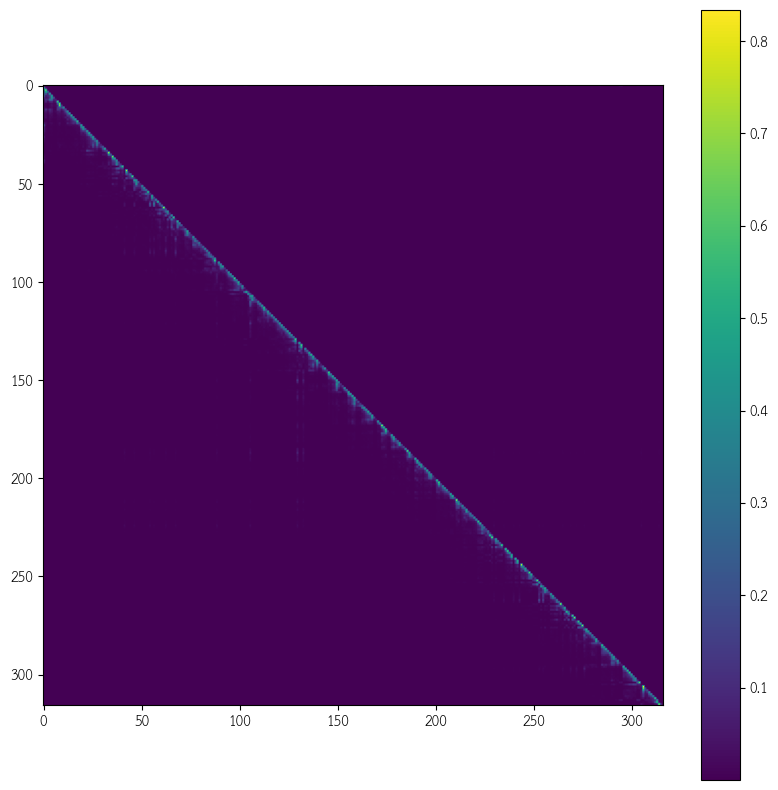

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

encoder1 = 3
encoder2 = 11
plt.imshow(outputs.encoder_attentions[encoder2][0][encoder1])

plt.colorbar()
plt.show()

In [9]:
# TASK 5
import matplotlib as mpl
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family']='TH Sarabun New'  #you can change to other font that works for you

--2023-05-12 03:52:33--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-05-12 03:52:33--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2023-05-12 03:52:33 (5.99 MB/s) - ‘t

In [19]:
encoder_id = 0

fig, ax = plt.subplots(1, 5, figsize=(300,40))
for i in range(1):
    x_axis_labels = tokenizer.batch_decode(inputs[0], skip_special_tokens=True)
    y_axis_labels = x_axis_labels

    sns.heatmap(outputs.encoder_attentions[0][0][encoder_id], 
                annot=True, ax=ax[i], fmt='.2f',
                xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    
    # ax[i].set_title(f'{EXAMPLES[i]} => {"".join(y_axis_labels).replace("<PAD>","")}')



> 💡 [Text generation strategies](https://huggingface.co/docs/transformers/v4.29.0/en/generation_strategies#text-generation-strategies)



## Method 1B: **mT5** on *simple transformer*



In [ ]:
!pip install simpletransformers==0.63.4

In [ ]:
from simpletransformers.t5 import T5Model, T5Args
from torch import cuda

**Simple Tranformers / [T5 Model](https://simpletransformers.ai/docs/t5-model/)**

In [ ]:
# Configuring a T5Model
model_args = T5Args()

model_args.max_length = 100
# The max length of the sequence to be generated. Between 0 and infinity. Default to 20.

model_args.length_penalty = 2.0
# Exponential penalty to the length that is used with beam-based generation. (Default to 2.0)
# It is applied as an exponent to the sequence length, which in turn is used to divide 
# the score of the sequence. Since the score is the log likelihood of the sequence (i.e. negative), 
# length_penalty > 0.0 promotes longer sequences, while length_penalty < 0.0 encourages shorter sequences.

# Load T5Model
model = T5Model("t5", "thanathorn/mt5-cpe-kmutt-thai-sentence-sum", use_cuda=cuda.is_available(),
                args=model_args)

You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


In [ ]:
sentences = [
#     "ถ้าพูดถึงขนมหวานในตำนานที่ชื่นใจที่สุดแล้วละก็ต้องไม่พ้น น้ำแข็งใส แน่เพราะว่าเป็นอะไรที่ชื่นใจสุด",

#     "สถาบันวิทยาการหุ่นยนต์ภาคสนาม มหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี หรือเรียกว่าฟีโบ้ (FIBO) เป็นหน่วยงานระดับคณะ \
# ในสังกัดมหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี เริ่มเปิดทำการเรียนการสอนเมื่อ พ.ศ. 2538 ในชื่อ ศูนย์ปฏิบัติการพัฒนาหุ่นยนต์ภาคสนาม \
# ตามแผนพัฒนาการศึกษาฉบับที่ 7 เพื่อวิจัยพัฒนาการศึกษาระดับสูงทางด้านวิชาการหุ่นยนต์ และงานวิจัยทางด้านระบบอัตโนมัติในภาคอุตสาหกรรม \
# รวมถึงการให้บริการรับปรึกษาด้านอุตสาหกรรมต่างๆภายในประเทศ",

#     "หุ่นยนต์ประชาสัมพันธ์นะโม เป็นหุ่นยนต์กึ่งหุ่นยนต์ฮิวแมนนอยด์ ท่อนบนมีลักษณะเป็นหุ่นยนต์ที่มีลักษณะคล้ายมนุษย์ \
# ส่วนท่อนล่างเป็นล้อเพื่อเพิ่มความคล่องตัวและเสถียรภาพในการเคลื่อนที่ ประดิษฐ์โดยนักวิจัยของสถาบันวิทยาการหุ่นยนต์ภาคสนาม \
# นายบุญเลิศ มณีฉาย, ดร.ถวิดามณีวรรณ์ และ ศูนย์การศึกษาในเมือง(CODE) สนับสนุนทุนโดยมหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี \
# เผยแพร่ผลงานเมื่อ 29 มีนาคม พ.ศ. 2553",

    "วิถีชุมชนที่งดงามเรียบง่ายของชาวชนบทปรากฏให้เห็นเป็นปกติทุก ๆ เช้าตรู่ พ่อค้าแม่ค้าจะนำสินค้าประดามีของ \
ตัวเองหาบใส่กระบุง ตะกร้า มาวางขายในตลาด ให้เพื่อนบ้านมาเลือกซื้อหากัน ผักบุ้งนาสด ๆ ยอดตำลึงอ่อน หอย \
น้ำจืดตัวเล็ก ๆ แถมยังมีข้าวต้มมัดไส้กล้วย ไส้เผือก ให้ลองชิม ใครซื้อกลับไปก็ได้กับข้าวพร้อมขนมแสนอร่อยแบบ \
ไทย ๆ มื้อหนึ่งแล้ว",
# วิถีชุมชนที่งดงามเรียบง่ายของชาวชนบทปรากฏให้เห็นเป็นปกติทุก ๆ เช้าตรู่

    "ในบรรดาเครื่องบินทั้งหมด เฮลิคอปเตอร์เป็นอากาศยานที่คล่องตัวมากที่สุด สามารถบินตรงไปข้างหน้า ถอยหลัง \
หรือบินไปข้าง ๆ ได้ บินขึ้นลงในแนวดิ่ง หรือแม้แต่บินอยู่นิ่ง ๆ กลางอากาศก็ได้ เพราะเฮลิคอปเตอร์บินขึ้นลงใน \
แนวดิ่งได้นี่เอง จึงไม่จำเป็นต้องมีทางวิ่ง (runway) ก็สามารถบินขึ้นลงได้เกือบทุกหนทุกแห่ง",
# ในบรรดาเครื่องบินทั้งหมด เฮลิคอปเตอร์เป็นอากาศยานที่คล่องตัวมากที่สุด

    "ชีวิตของคนเมืองหลวงในปัจจุบันมีแต่ความเคร่งเครียดและเร่งรีบในการปฏิบัติภารกิจต่าง ๆ ในชีวิตประจำวันทำให้ \
บางครั้งรับประทานอาหารไม่เป็นเวลาหรือไม่ได้รับประทานอาหารตรงตามมื้ออาหาร บางคนต้องงดเว้นอาหารบางมื้อ \
ไปก็มี ปัญหาเหล่านี้ทำให้ร่างกายไม่ได้รับพลังงานและสารอาหารที่ต้องการอย่างเพียงพอในแต่ละวัน อันมีผลกระทบ \
ต่อสุขภาพทำให้ภูมิคุ้มกันร่างกายอ่อนแอ เกิดภาวะติดเชื้อโรคง่าย และเกิดเจ็บป่วย การรับประทานอาหารไม่ครบ \
ทุกมื้อนับว่ามีโทษต่อสุขภาพอย่างยิ่ง",
# การรับประทานอาหาร ไม่ครบทุกมื้อนับว่ามีโทษต่อสุขภาพอย่างยิ่ง

    "ศิลปะการฟังไม่ได้หมายถึง การนั่งนิ่ง ปล่อยให้ผู้อื่นพูดฝ่ายเดียว แล้วก็ฟังเหมือนฟังเทศน์ การทำเช่นนั้นง่ายเกินกว่า \
ที่จะนับว่าเป็นศิลปะ ศิลปะแห่งการฟังหมายถึงความสามารถที่จะชักจูงให้ผู้พูดให้หันเหเข้าหาเรื่องที่เขาถนัดที่สุด คือ \
แสดงให้เห็นว่าตนกำลังฟังคำพูดของเขาด้วยความตั้งใจอยากรู้ อยากฟังจริง ๆ รู้จักสอดคำถามในโอกาสที่เหมาะ รู้จัก \
ปล่อยให้ผู้พูดพูดจนสิ้นกระแสความ รู้จักช่วยผู้พูดที่กำลังจะหมดเรื่องพูดให้กลับมีเรื่องขึ้นมาใหม่เพื่อให้เขาพูดต่อไปได้",
# ศิลปะแห่งการฟังหมายถึงความสามารถที่จะชักจูงให้ผู้พูดให้หันเหเข้าหาเรื่องที่เขาถนัดที่สุด

    "ชีวิตของคนไทยเกี่ยวข้องกับพืชพันธุ์ต่าง ๆ อย่างใกล้ชิดมาช้านาน บ้านเรือนของเราสร้างมาจากไม้ อาหารหลักของ \
ไทยเราคือ ผักพื้นบ้านต่าง ๆ หาได้ง่ายขึ้นอยู่รายรอบตัวเรา ยามเจ็บป่วยคนไทยเราก็พึ่งพายาซึ่งปรุงมาจากพืชต่าง ๆ \
แม้กระทั่งงานศิลปะเราก็พบว่า ศิลปะของไทยหลายแขนงสร้างสรรค์ขึ้นมาจากการใช้พืชพันธุ์ต่าง ๆ เป็นส่วนประกอบ \
เช่นกัน แต่ปัจจุบันนี้อิฐ หิน ทราย และเหล็กเข้ามาแทนที่ไม้ที่นับวันจะหายากและมีราคาสูงขึ้น พลาสติก โฟม \
และอลูมิเนียมฟอยล์ เข้ามาแทนที่ใบตองที่เราเคยใช้ห่อหุ้มอาหาร สารเคมีต่าง ๆ เข้ามาแทนที่ยาสมุนไพรจาก \
ธรรมชาติ สิ่งต่าง ๆ ที่กล่าวมานี้แสดงให้เห็นอย่างเด่นชัดว่า ความเจริญของสังคมไทยในยุคปัจจุบันกำลังฉุดดึงวิถีชีวิต \
ของคนไทยให้ห่างไกลจากพืชพันธุ์ธรรมชาติมากขึ้นทุกที",
# ชีวิตของคนไทยเกี่ยวข้องกับพืชพันธุ์ต่าง ๆ อย่างใกล้ชิดมาช้านาน แต่ความเจริญของสังคมไทยในยุคปัจจุบันกำลังฉุดดึงวิถีชีวิตของคนไทยให้ห่างไกลจากพืชพันธุ์ธรรมชาติมากขึ้นทุกที

    "การคิดอยากจะมีรถเก๋งไว้ใช้สักคัน ก็เปรียบดังหนุ่มสาวที่รักกันกำลังคิดจะแต่งงานกันและหลังจากได้ตกลงปลงใจซื้อ \
รถเก๋งแล้ว ก็ย่อมดุจหนุ่มสาวคู่นั้นได้แต่งงานแล้วเสร็จมาแรมปี พร้อมมีลูกไว้เชยชมอีกคนหนึ่ง ช่างเป็นสิ่งที่น่าชื่นชม \
ทางใจไม่น้อยเลย แต่ส่วนลึกของความชื่นชมนั้น ท่านต้องเสียค่าใช้จ่ายชนิดปฏิเสธไม่ได้อย่างมากมายเช่นกัน จนมี \
คนเปรียบไว้ว่ามีรถเก๋งก็เหมือนมีลูกคนเล็กจะต้องดูแลรักษา บริการ และเอาใจใส่สารพัน ซึ่งก็คือ เงิน เงิน และก็ \
เงินอย่างแน่นอน",
# การมีรถเก๋งไว้ใช้ทำให้เสียเงินมาก หรือ การมีรถเก๋งไว้ใช้ทำให้ต้องใช้เงินมาก

    "ถ้าจะแปลคำสรรพนามของไทยเป็นภาษาอังกฤษ เราจะแปลได้อย่างง่ายดาย เพียงแต่รู้ว่าเป็นบุรุษที่หนึ่ง คือ ผู้พูด \
หรือบุรุษที่สอง คือ ผู้ที่พูดด้วยเท่านั้น เพราะในภาษาอังกฤษจะใช้สรรพนาม I กับ You เป็นส่วนใหญ่ แต่เมื่อจะแปล \
จากภาษาอังกฤษเป็นภาษาไทย ผู้แปลจะต้องพบความยากลำบาก เพราะไม่สามารถจะหาคำแปลได้ในทันที ผู้แปล \
จะต้องหาข้อมูลให้ได้ก่อนว่า ผู้ใช้คำว่า I นั้นเป็นใคร เพศอะไร อายุมากน้อยเพียงใด กำลังพูดกับใคร มี \
ความสัมพันธ์กับผู้พูดในสถานใด และขณะที่พูดนั้นเป็นการพูดอย่างเป็นทางการหรือเป็นกันเอง มีอารมณ์อย่างไร \
นอกจากนี้ยังต้องรู้ว่าผู้พูดนั้นมีพื้นฐานทางสังคมระดับใด ผู้ที่มีพื้นฐานทางสังคมต่างกันก็อาจใช้คำที่ต่างกันออกไปอีก \
จึงอาจกล่าวได้ว่า ในภาษาไทยคำสรรพนามสะท้อนวัฒนธรรมไทยอย่างชัดเจน",
# ในภาษาไทยคำสรรพนามสะท้อนวัฒนธรรมไทยอย่างชัดเจน

    "เมื่อครั้งโบราณกาลบันทึกเกี่ยวกับวันเวลาเกิดของบุตรหลานมักไม่ชัดเจน เช่น บันทึกว่าบุตรคนที่หนึ่งคลอดวันพุธ \
ขึ้นเจ็ดค่ำ เวลาตกฟากเที่ยงวัน เป็นต้น การบันทึกดังกล่าวเป็นการบันทึกตามแบบไทย แต่ในปัจจุบันคนไทยส่วน \
ใหญ่คลอดที่โรงพยาบาล ทางโรงพยาบาลจึงบันทึกเวลาคลอดไว้ชัดเจน เช่น บันทึกว่าบุตรคนที่สองคลอดวันที่ ๑๕ \
ธันวาคม ๒๕๒๑ เวลา ๖.๔๕ น. เป็นต้น การบันทึกวันเวลาแบบที่สองนี้ใช้วันเดือนปีโดยหลักสากลที่ใช้กันทั่วไป \
อย่างไรก็ตามคนไทยเรานิยมบันทึกวันเวลาเกิดทั้งตามแบบไทยและตามแบบสากล",

# คนไทยเรานิยมบันทึกวันเวลาเกิดทั้งตามแบบไทยและตามแบบสากล

    "ปัจจัยที่ทำให้นกตะกรุมลดจำนวนลง ก็คือการทำลายแหล่งทำกิน โดยเฉพาะป่าชายเลนซึ่งเป็นแหล่งที่อยู่อาศัยหลัก \
ของนกชนิดนี้ โครงการพัฒนาต่าง ๆ ทำให้ป่าที่ราบต่ำและป่าพรุกำลังจะหมดไป นกตะกรุมจึงขาดแหล่งหากินสำคัญ \
การล่าก็เป็นปัจจัยหนึ่งที่ทำให้นกตะกรุมลดจำนวนลง ไม่ว่าจะเป็นการล่าเพื่อนำมาเป็นอาหาร หรือล่าเพื่อแลกกับ \
ค่าจ้างที่ได้รับมาจากสวนสัตว์",
# ปัจจัยที่ทำให้นกตะกรุมลดจำนวนลงก็คือการทำลายแหล่งทำกินและการล่า

    "ในประเทศไทยปัจจุบัน เราจะไม่พบซ่อนกลิ่นปลูกอยู่ตามบ้านเรือนทั่วไป สถานที่แห่งเดียวที่จะพบซ่อนกลิ่นได้ก็คือใน \
พิธีฌาปนกิจศพ ผู้ที่ไปร่วมงานสวดพระอภิธรรมจะได้กลิ่นหอมจากดอกซ่อนกลิ่นซึ่งมักจะมีกลิ่นหอมแรงในเวลาเย็น \
และกลางคืน ดอกซ่อนกลิ่นและกลิ่นของดอกไม้ชนิดนี้จึงกลายเป็นเครื่องหมายของความโศกเศร้า ความพลัดพราก \
ความสูญเสีย ซึ่งหมายรวมถึงความทุกข์ไปโดยปริยาย หากมีผู้นำดอกซ่อนกลิ่นไปมอบให้ในโอกาสมงคล เช่น วันเกิด \
วันขึ้นปีใหม่ วันแต่งงาน จะถือเป็นเรื่องคอขาดบาดตาย แสดงความประสงค์ร้าย",
# ดอกซ่อนกลิ่นและกลิ่นของดอกไม้ชนิดนี้จึงกลายเป็นเครื่องหมายของความทุกข์
]
prediction = model.predict(sentences)

# for p in prediction: print(p)

print("\n<input length> => <output length>\n\tprediction result...\n")
for i in range(len(prediction)): 
    print(f"<{len(sentences[i])}> => <{len(prediction[i])}>\n\t{prediction[i]}\n")

Generating outputs:   0%|          | 0/2 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/10 [00:00<?, ?it/s]


<input length> => <output length>
prediction result...

<332> => <69>
	วิถีชุมชนที่งดงามเรียบง่ายของชาวชนบท ปรากฏให้เห็นเป็นปกติทุก เช้าตรู่

<297> => <43>
	เครื่องบินเฮลิคอปเตอร์บินขึ้นลงในแนวดิ่งได้

<450> => <41>
	ร่างกายไม่ได้รับพลังงานและสารอาหารเพียงพอ

<455> => <64>
	ศิลปะการฟังไม่ได้หมายถึง การนั่งนิ่ง ปล่อยให้ผู้อื่นพูดฝ่ายเดียว

<686> => <54>
	คนไทยเกี่ยวข้องกับพืชพันธุ์ต่าง ๆ อย่างใกล้ชิดมาช้านาน

<453> => <87>
	นิสัยดีของผู้ชายที่รักกันและเมื่อได้ตกลงปลงใจซื้อ รถเก๋งก็เหมือนมีลูกไว้เชยชมอีกคนหนึ่ง

<688> => <62>
	การใช้สรรพนามไทยเป็นภาษาไทยจะใช้สรรพนาม I กับ You เป็นส่วนใหญ่

<478> => <68>
	คนไทยส่วนใหญ่คลอดที่โรงพยาบาล ทางโรงพยาบาลบันทึกวันเวลาเกิดไว้ชัดเจน

<338> => <27>
	นกตะกรุมขาดแหล่งหากินสําคัญ

<483> => <54>
	ดอกไม้ที่ซ่อนกลิ่นจะกลายเป็นเครื่องหมายของความโศกเศร้า



(Note from author) Here is a short example:

``` python
model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]
```

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

## Method 1C: mT5 Encoder (small)

In [ ]:
from transformers import MT5Model, MT5EncoderModel, AutoTokenizer, MT5ForConditionalGeneration

**Hugging face Tranformers / [mT5](https://huggingface.co/docs/transformers/main/en/model_doc/mt5#transformers.MT5ForConditionalGeneration)**

In [ ]:
model_name = "google/mt5-small" # you can specify the model size here

tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = MT5EncoderModel.from_pretrained(model_name, 
#                                         output_attentions=True)

# config = AutoConfig.from_pretrained(model_name)
# model = TFAutoModelForSeq2SeqLM.from_config(config)
# model = TFAutoModelForSeq2SeqLM.from_pretrained(model_name, 
#                                                 output_attentions=True)

model = MT5ForConditionalGeneration.from_pretrained(model_name,
                                                    output_attentions=True,
                                                    )

In [ ]:
model.config
# model.encoder

MT5Config {
  "_name_or_path": "google/mt5-small",
  "architectures": [
    "MT5ForConditionalGeneration"
  ],
  "d_ff": 1024,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "mt5",
  "num_decoder_layers": 8,
  "num_heads": 6,
  "num_layers": 8,
  "output_attentions": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "tie_word_embeddings": false,
  "tokenizer_class": "T5Tokenizer",
  "transformers_version": "4.28.1",
  "use_cache": true,
  "vocab_size": 250112
}

In [ ]:
# model.decoder

In [ ]:
# tokenizer

In [ ]:
article = "summarize: UN Offizier sagt, dass weiter verhandelt werden muss in Syrien."
# article = "สถาบันวิทยาการหุ่นยนต์ภาคสนาม มหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี หรือเรียกว่าฟีโบ้ (FIBO) เป็นหน่วยงานระดับคณะ \
# ในสังกัดมหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี เริ่มเปิดทำการเรียนการสอนเมื่อ พ.ศ. 2538 ในชื่อ ศูนย์ปฏิบัติการพัฒนาหุ่นยนต์ภาคสนาม \
# ตามแผนพัฒนาการศึกษาฉบับที่ 7 เพื่อวิจัยพัฒนาการศึกษาระดับสูงทางด้านวิชาการหุ่นยนต์ และงานวิจัยทางด้านระบบอัตโนมัติในภาคอุตสาหกรรม \
# รวมถึงการให้บริการรับปรึกษาด้านอุตสาหกรรมต่างๆภายในประเทศ"

input_ids = tokenizer(article, return_tensors="pt").input_ids
# labels = tokenizer(text_target=summary, return_tensors="pt")

# outputs = model(input_ids)
outputs = model.generate(input_ids)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
# input_ids

tensor([[ 10969,    443, 209522,    295,    259,   8992,    261,    259,   3648,
           8104,    672,  53764,   2100,   8497,    281,  55984,    278,    260,
              1]])

In [ ]:
outputs
# print(tokenizer.decode(outputs[0], skip_special_tokens=True))

tensor([[     0, 250099,      1]])

In [ ]:
outputs.last_hidden_state

In [ ]:
input_ids.shape, outputs.last_hidden_state.shape

In [ ]:
for attention in outputs.attentions: print(attention.shape)

AttributeError: ignored

In [ ]:
outputs.hidden_states

In [ ]:
model.decoder(outputs[0])

RuntimeError: ignored

# Method 2: **BART** on *hugging face*

BART model pre-trained on English language, and fine-tuned on CNN Daily Mail. It was introduced in the paper [*BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension by Lewis et al*](https://arxiv.org/abs/1910.13461). and first released in [this repository](https://github.com/pytorch/fairseq/tree/master/examples/bart).

Disclaimer: The team releasing BART did not write a model card for this model so this model card has been written by the Hugging Face team.

**Model description**

BART is a transformer encoder-encoder (seq2seq) model with a bidirectional (BERT-like) encoder and an autoregressive (GPT-like) decoder. BART is pre-trained by (1) corrupting text with an arbitrary noising function, and (2) learning a model to reconstruct the original text.

BART is particularly effective when fine-tuned for text generation (e.g. summarization, translation) but also works well for comprehension tasks (e.g. text classification, question answering). This particular checkpoint has been fine-tuned on CNN Daily Mail, a large collection of text-summary pairs.

In [ ]:
from transformers import pipeline
from tqdm import tqdm

In [ ]:

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


In [ ]:
sentences = [
#     "ถ้าพูดถึงขนมหวานในตำนานที่ชื่นใจที่สุดแล้วละก็ต้องไม่พ้น น้ำแข็งใส แน่เพราะว่าเป็นอะไรที่ชื่นใจสุด",

#     "สถาบันวิทยาการหุ่นยนต์ภาคสนาม มหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี หรือเรียกว่าฟีโบ้ (FIBO) เป็นหน่วยงานระดับคณะ \
# ในสังกัดมหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี เริ่มเปิดทำการเรียนการสอนเมื่อ พ.ศ. 2538 ในชื่อ ศูนย์ปฏิบัติการพัฒนาหุ่นยนต์ภาคสนาม \
# ตามแผนพัฒนาการศึกษาฉบับที่ 7 เพื่อวิจัยพัฒนาการศึกษาระดับสูงทางด้านวิชาการหุ่นยนต์ และงานวิจัยทางด้านระบบอัตโนมัติในภาคอุตสาหกรรม \
# รวมถึงการให้บริการรับปรึกษาด้านอุตสาหกรรมต่างๆภายในประเทศ",

#     "หุ่นยนต์ประชาสัมพันธ์นะโม เป็นหุ่นยนต์กึ่งหุ่นยนต์ฮิวแมนนอยด์ ท่อนบนมีลักษณะเป็นหุ่นยนต์ที่มีลักษณะคล้ายมนุษย์ \
# ส่วนท่อนล่างเป็นล้อเพื่อเพิ่มความคล่องตัวและเสถียรภาพในการเคลื่อนที่ ประดิษฐ์โดยนักวิจัยของสถาบันวิทยาการหุ่นยนต์ภาคสนาม \
# นายบุญเลิศ มณีฉาย, ดร.ถวิดามณีวรรณ์ และ ศูนย์การศึกษาในเมือง(CODE) สนับสนุนทุนโดยมหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี \
# เผยแพร่ผลงานเมื่อ 29 มีนาคม พ.ศ. 2553",

    "วิถีชุมชนที่งดงามเรียบง่ายของชาวชนบทปรากฏให้เห็นเป็นปกติทุก ๆ เช้าตรู่ พ่อค้าแม่ค้าจะนำสินค้าประดามีของ \
ตัวเองหาบใส่กระบุง ตะกร้า มาวางขายในตลาด ให้เพื่อนบ้านมาเลือกซื้อหากัน ผักบุ้งนาสด ๆ ยอดตำลึงอ่อน หอย \
น้ำจืดตัวเล็ก ๆ แถมยังมีข้าวต้มมัดไส้กล้วย ไส้เผือก ให้ลองชิม ใครซื้อกลับไปก็ได้กับข้าวพร้อมขนมแสนอร่อยแบบ \
ไทย ๆ มื้อหนึ่งแล้ว",
# วิถีชุมชนที่งดงามเรียบง่ายของชาวชนบทปรากฏให้เห็นเป็นปกติทุก ๆ เช้าตรู่

    "ในบรรดาเครื่องบินทั้งหมด เฮลิคอปเตอร์เป็นอากาศยานที่คล่องตัวมากที่สุด สามารถบินตรงไปข้างหน้า ถอยหลัง \
หรือบินไปข้าง ๆ ได้ บินขึ้นลงในแนวดิ่ง หรือแม้แต่บินอยู่นิ่ง ๆ กลางอากาศก็ได้ เพราะเฮลิคอปเตอร์บินขึ้นลงใน \
แนวดิ่งได้นี่เอง จึงไม่จำเป็นต้องมีทางวิ่ง (runway) ก็สามารถบินขึ้นลงได้เกือบทุกหนทุกแห่ง",
# ในบรรดาเครื่องบินทั้งหมด เฮลิคอปเตอร์เป็นอากาศยานที่คล่องตัวมากที่สุด

    "ชีวิตของคนเมืองหลวงในปัจจุบันมีแต่ความเคร่งเครียดและเร่งรีบในการปฏิบัติภารกิจต่าง ๆ ในชีวิตประจำวันทำให้ \
บางครั้งรับประทานอาหารไม่เป็นเวลาหรือไม่ได้รับประทานอาหารตรงตามมื้ออาหาร บางคนต้องงดเว้นอาหารบางมื้อ \
ไปก็มี ปัญหาเหล่านี้ทำให้ร่างกายไม่ได้รับพลังงานและสารอาหารที่ต้องการอย่างเพียงพอในแต่ละวัน อันมีผลกระทบ \
ต่อสุขภาพทำให้ภูมิคุ้มกันร่างกายอ่อนแอ เกิดภาวะติดเชื้อโรคง่าย และเกิดเจ็บป่วย การรับประทานอาหารไม่ครบ \
ทุกมื้อนับว่ามีโทษต่อสุขภาพอย่างยิ่ง",
# การรับประทานอาหาร ไม่ครบทุกมื้อนับว่ามีโทษต่อสุขภาพอย่างยิ่ง

    "ศิลปะการฟังไม่ได้หมายถึง การนั่งนิ่ง ปล่อยให้ผู้อื่นพูดฝ่ายเดียว แล้วก็ฟังเหมือนฟังเทศน์ การทำเช่นนั้นง่ายเกินกว่า \
ที่จะนับว่าเป็นศิลปะ ศิลปะแห่งการฟังหมายถึงความสามารถที่จะชักจูงให้ผู้พูดให้หันเหเข้าหาเรื่องที่เขาถนัดที่สุด คือ \
แสดงให้เห็นว่าตนกำลังฟังคำพูดของเขาด้วยความตั้งใจอยากรู้ อยากฟังจริง ๆ รู้จักสอดคำถามในโอกาสที่เหมาะ รู้จัก \
ปล่อยให้ผู้พูดพูดจนสิ้นกระแสความ รู้จักช่วยผู้พูดที่กำลังจะหมดเรื่องพูดให้กลับมีเรื่องขึ้นมาใหม่เพื่อให้เขาพูดต่อไปได้",
# ศิลปะแห่งการฟังหมายถึงความสามารถที่จะชักจูงให้ผู้พูดให้หันเหเข้าหาเรื่องที่เขาถนัดที่สุด

    "ชีวิตของคนไทยเกี่ยวข้องกับพืชพันธุ์ต่าง ๆ อย่างใกล้ชิดมาช้านาน บ้านเรือนของเราสร้างมาจากไม้ อาหารหลักของ \
ไทยเราคือ ผักพื้นบ้านต่าง ๆ หาได้ง่ายขึ้นอยู่รายรอบตัวเรา ยามเจ็บป่วยคนไทยเราก็พึ่งพายาซึ่งปรุงมาจากพืชต่าง ๆ \
แม้กระทั่งงานศิลปะเราก็พบว่า ศิลปะของไทยหลายแขนงสร้างสรรค์ขึ้นมาจากการใช้พืชพันธุ์ต่าง ๆ เป็นส่วนประกอบ \
เช่นกัน แต่ปัจจุบันนี้อิฐ หิน ทราย และเหล็กเข้ามาแทนที่ไม้ที่นับวันจะหายากและมีราคาสูงขึ้น พลาสติก โฟม \
และอลูมิเนียมฟอยล์ เข้ามาแทนที่ใบตองที่เราเคยใช้ห่อหุ้มอาหาร สารเคมีต่าง ๆ เข้ามาแทนที่ยาสมุนไพรจาก \
ธรรมชาติ สิ่งต่าง ๆ ที่กล่าวมานี้แสดงให้เห็นอย่างเด่นชัดว่า ความเจริญของสังคมไทยในยุคปัจจุบันกำลังฉุดดึงวิถีชีวิต \
ของคนไทยให้ห่างไกลจากพืชพันธุ์ธรรมชาติมากขึ้นทุกที",
# ชีวิตของคนไทยเกี่ยวข้องกับพืชพันธุ์ต่าง ๆ อย่างใกล้ชิดมาช้านาน แต่ความเจริญของสังคมไทยในยุคปัจจุบันกำลังฉุดดึงวิถีชีวิตของคนไทยให้ห่างไกลจากพืชพันธุ์ธรรมชาติมากขึ้นทุกที

    "การคิดอยากจะมีรถเก๋งไว้ใช้สักคัน ก็เปรียบดังหนุ่มสาวที่รักกันกำลังคิดจะแต่งงานกันและหลังจากได้ตกลงปลงใจซื้อ \
รถเก๋งแล้ว ก็ย่อมดุจหนุ่มสาวคู่นั้นได้แต่งงานแล้วเสร็จมาแรมปี พร้อมมีลูกไว้เชยชมอีกคนหนึ่ง ช่างเป็นสิ่งที่น่าชื่นชม \
ทางใจไม่น้อยเลย แต่ส่วนลึกของความชื่นชมนั้น ท่านต้องเสียค่าใช้จ่ายชนิดปฏิเสธไม่ได้อย่างมากมายเช่นกัน จนมี \
คนเปรียบไว้ว่ามีรถเก๋งก็เหมือนมีลูกคนเล็กจะต้องดูแลรักษา บริการ และเอาใจใส่สารพัน ซึ่งก็คือ เงิน เงิน และก็ \
เงินอย่างแน่นอน",
# การมีรถเก๋งไว้ใช้ทำให้เสียเงินมาก หรือ การมีรถเก๋งไว้ใช้ทำให้ต้องใช้เงินมาก

    "ถ้าจะแปลคำสรรพนามของไทยเป็นภาษาอังกฤษ เราจะแปลได้อย่างง่ายดาย เพียงแต่รู้ว่าเป็นบุรุษที่หนึ่ง คือ ผู้พูด \
หรือบุรุษที่สอง คือ ผู้ที่พูดด้วยเท่านั้น เพราะในภาษาอังกฤษจะใช้สรรพนาม I กับ You เป็นส่วนใหญ่ แต่เมื่อจะแปล \
จากภาษาอังกฤษเป็นภาษาไทย ผู้แปลจะต้องพบความยากลำบาก เพราะไม่สามารถจะหาคำแปลได้ในทันที ผู้แปล \
จะต้องหาข้อมูลให้ได้ก่อนว่า ผู้ใช้คำว่า I นั้นเป็นใคร เพศอะไร อายุมากน้อยเพียงใด กำลังพูดกับใคร มี \
ความสัมพันธ์กับผู้พูดในสถานใด และขณะที่พูดนั้นเป็นการพูดอย่างเป็นทางการหรือเป็นกันเอง มีอารมณ์อย่างไร \
นอกจากนี้ยังต้องรู้ว่าผู้พูดนั้นมีพื้นฐานทางสังคมระดับใด ผู้ที่มีพื้นฐานทางสังคมต่างกันก็อาจใช้คำที่ต่างกันออกไปอีก \
จึงอาจกล่าวได้ว่า ในภาษาไทยคำสรรพนามสะท้อนวัฒนธรรมไทยอย่างชัดเจน",
# ในภาษาไทยคำสรรพนามสะท้อนวัฒนธรรมไทยอย่างชัดเจน

    "เมื่อครั้งโบราณกาลบันทึกเกี่ยวกับวันเวลาเกิดของบุตรหลานมักไม่ชัดเจน เช่น บันทึกว่าบุตรคนที่หนึ่งคลอดวันพุธ \
ขึ้นเจ็ดค่ำ เวลาตกฟากเที่ยงวัน เป็นต้น การบันทึกดังกล่าวเป็นการบันทึกตามแบบไทย แต่ในปัจจุบันคนไทยส่วน \
ใหญ่คลอดที่โรงพยาบาล ทางโรงพยาบาลจึงบันทึกเวลาคลอดไว้ชัดเจน เช่น บันทึกว่าบุตรคนที่สองคลอดวันที่ ๑๕ \
ธันวาคม ๒๕๒๑ เวลา ๖.๔๕ น. เป็นต้น การบันทึกวันเวลาแบบที่สองนี้ใช้วันเดือนปีโดยหลักสากลที่ใช้กันทั่วไป \
อย่างไรก็ตามคนไทยเรานิยมบันทึกวันเวลาเกิดทั้งตามแบบไทยและตามแบบสากล",

# คนไทยเรานิยมบันทึกวันเวลาเกิดทั้งตามแบบไทยและตามแบบสากล

    "ปัจจัยที่ทำให้นกตะกรุมลดจำนวนลง ก็คือการทำลายแหล่งทำกิน โดยเฉพาะป่าชายเลนซึ่งเป็นแหล่งที่อยู่อาศัยหลัก \
ของนกชนิดนี้ โครงการพัฒนาต่าง ๆ ทำให้ป่าที่ราบต่ำและป่าพรุกำลังจะหมดไป นกตะกรุมจึงขาดแหล่งหากินสำคัญ \
การล่าก็เป็นปัจจัยหนึ่งที่ทำให้นกตะกรุมลดจำนวนลง ไม่ว่าจะเป็นการล่าเพื่อนำมาเป็นอาหาร หรือล่าเพื่อแลกกับ \
ค่าจ้างที่ได้รับมาจากสวนสัตว์",
# ปัจจัยที่ทำให้นกตะกรุมลดจำนวนลงก็คือการทำลายแหล่งทำกินและการล่า

    "ในประเทศไทยปัจจุบัน เราจะไม่พบซ่อนกลิ่นปลูกอยู่ตามบ้านเรือนทั่วไป สถานที่แห่งเดียวที่จะพบซ่อนกลิ่นได้ก็คือใน \
พิธีฌาปนกิจศพ ผู้ที่ไปร่วมงานสวดพระอภิธรรมจะได้กลิ่นหอมจากดอกซ่อนกลิ่นซึ่งมักจะมีกลิ่นหอมแรงในเวลาเย็น \
และกลางคืน ดอกซ่อนกลิ่นและกลิ่นของดอกไม้ชนิดนี้จึงกลายเป็นเครื่องหมายของความโศกเศร้า ความพลัดพราก \
ความสูญเสีย ซึ่งหมายรวมถึงความทุกข์ไปโดยปริยาย หากมีผู้นำดอกซ่อนกลิ่นไปมอบให้ในโอกาสมงคล เช่น วันเกิด \
วันขึ้นปีใหม่ วันแต่งงาน จะถือเป็นเรื่องคอขาดบาดตาย แสดงความประสงค์ร้าย",
# ดอกซ่อนกลิ่นและกลิ่นของดอกไม้ชนิดนี้จึงกลายเป็นเครื่องหมายของความทุกข์
]
for sentense in sentences:
    print(summarizer( sentense, max_length=130, min_length=30, do_sample=False))

# for p in prediction: print(p)

# print("\n<input length> => <output length>\n\tprediction result...\n")
# for i in range(len(prediction)): 
#     print(f"<{len(sentences[i])}> => <{len(prediction[i])}>\n\t{prediction[i]}\n")

[{'summary_text': '   \xa0‘’\u2009’ทป’   ‘”’\xa0“”  “’้\u2009ำจืด”: ”“ผักบุ้งนาสส’ ”:  ก’-“\xa0”\xa0‚’, “ฉ”-”, \u2009“, ”,” \u2009,\u2009'}]
[{'summary_text': 'The runway is located at the airport in Atlanta, Georgia. The runway is made up of two sections: one for landing and the other for take-off.'}]


KeyboardInterrupt: ignored

# Hugging face **Inference API**

Try this out! -> [Inference API](https://huggingface.co/inference-api)

In [ ]:
API_TOKEN = ''

# Get your API by register or login on hugging face
# https://huggingface.co/docs/api-inference/quicktour#get-your-api-token

In [ ]:
# Code from https://huggingface.co/docs/api-inference/detailed_parameters#summarization-task
import json
import requests

headers = {"Authorization": f"Bearer {API_TOKEN}"}

# API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-cnn"                     # Select model here
API_URL = "https://api-inference.huggingface.co/models/thanathorn/mt5-cpe-kmutt-thai-sentence-sum" 
# API_URL = "https://api-inference.huggingface.co/models/monsoon-nlp/bert-base-thai" 

def query(payload):
    data = json.dumps(payload)
    response = requests.request("POST", API_URL, headers=headers, data=data)
    return json.loads(response.content.decode("utf-8"))

data = query(
    {
        "inputs": "สถาบันวิทยาการหุ่นยนต์ภาคสนาม มหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี หรือเรียกว่าฟีโบ้ (FIBO) เป็นหน่วยงานระดับคณะ \
# ในสังกัดมหาวิทยาลัยเทคโนโลยีพระจอมเกล้าธนบุรี เริ่มเปิดทำการเรียนการสอนเมื่อ พ.ศ. 2538 ในชื่อ ศูนย์ปฏิบัติการพัฒนาหุ่นยนต์ภาคสนาม \
# ตามแผนพัฒนาการศึกษาฉบับที่ 7 เพื่อวิจัยพัฒนาการศึกษาระดับสูงทางด้านวิชาการหุ่นยนต์ และงานวิจัยทางด้านระบบอัตโนมัติในภาคอุตสาหกรรม \
# รวมถึงการให้บริการรับปรึกษาด้านอุตสาหกรรมต่างๆภายในประเทศ",
     
        "parameters": {"do_sample": False, 
        
                       "min_length": None, 
                       "max_length": None},
     
        # "options": {"wait_for_model": False},
    }
)

# Show output
data

{'error': 'Model thanathorn/mt5-cpe-kmutt-thai-sentence-sum is currently loading',
 'estimated_time': 20.0}

# **Highlight** Text using Weights

More idea: 💡 [BertViz](https://github.com/jessevig/bertviz) an interactive tool for visualizing attention in Transformer language models such as BERT, GPT2, or T5

In [90]:
import pandas as pd
import numpy as np
import html
from IPython.core.display import display, HTML

# Prevent special characters like & and < to cause the browser to display something other than what you intended.
def html_escape(text):
    return html.escape(text)

tokens = tokenizer.convert_ids_to_tokens(inputs[0]) 

In [91]:
# https://adataanalyst.com/machine-learning/highlight-text-using-weights/

def highlightedText(tokens, attention, encoder1: int=0, encoder2: int=0, pad='', max_alpha=0.6, save_html=False) -> list:

    highlighted_text = []
    for i, word in enumerate(tokens):
        if word=='▁': word = ' ' # change space '▁' to ' '
        if '▁' in word: word = word.replace('▁', ' ')
        if '▁' in word: print(word)

        df_sumcol = pd.DataFrame(attention[encoder1][0][encoder2]).sum(axis=0)
        weight = df_sumcol[i]
        
        if weight is not None:
            highlighted_text.append('<span style="background-color:rgba(135,206,250,' + str(weight * max_alpha) + ');">' + html_escape(word) + '</span>')
        else:
            highlighted_text.append(word)
    highlighted_text = pad.join(highlighted_text)

    display(HTML(highlighted_text))

    if save_html:
        html = HTML(highlighted_text).data
        # file name ex. attention_0_1.html
        with open(f'attention_{encoder1}_{encoder2}.html', 'w') as f:
            f.write(html)

    return highlighted_text

highlighted_text = highlightedText(tokens, attention, 6, 0, save_html=True)

In [92]:
highlighted_text = highlightedText(tokens, attention, 6, 0, pad=' ')

In [93]:
highlighted_text

'<span style="background-color:rgba(135,206,250,15.168177286783855);"> </span> <span style="background-color:rgba(135,206,250,0.12419788787762324);">แนวโน้ม</span> <span style="background-color:rgba(135,206,250,0.2158961445093155);">ของ</span> <span style="background-color:rgba(135,206,250,0.2303691456715266);">การใช้</span> <span style="background-color:rgba(135,206,250,1.3915738463401794);">หุ่น</span> <span style="background-color:rgba(135,206,250,2.6882026592890425);">ย</span> <span style="background-color:rgba(135,206,250,2.323938806851705);">นต์</span> <span style="background-color:rgba(135,206,250,0.8838976422945659);">ทางด้าน</span> <span style="background-color:rgba(135,206,250,0.7640878359476726);">การผลิต</span> <span style="background-color:rgba(135,206,250,0.42627563079198205);">และ</span> <span style="background-color:rgba(135,206,250,0.2426104744275411);">งาน</span> <span style="background-color:rgba(135,206,250,0.65404345591863);">บริการ</span> <span style="background-c

In [75]:
encoder1 = 11
# encoder2 = 

for encoder2 in range(12):
    print('\nencoder1:', encoder1, '| encoder2:', encoder2)

    highlightedText(tokens, attention, encoder1, encoder2)


encoder1: 11 | encoder2: 0



encoder1: 11 | encoder2: 1



encoder1: 11 | encoder2: 2



encoder1: 11 | encoder2: 3



encoder1: 11 | encoder2: 4



encoder1: 11 | encoder2: 5



encoder1: 11 | encoder2: 6



encoder1: 11 | encoder2: 7



encoder1: 11 | encoder2: 8



encoder1: 11 | encoder2: 9



encoder1: 11 | encoder2: 10



encoder1: 11 | encoder2: 11
